In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10000)

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_
from sqlalchemy import (
    Column,
    Integer,
    String,
    Boolean,
    ForeignKey,
    DateTime,
    Sequence,
    Float
)

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('Measurement')
for c in columns:
   print(c['name'], c["type"])
columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

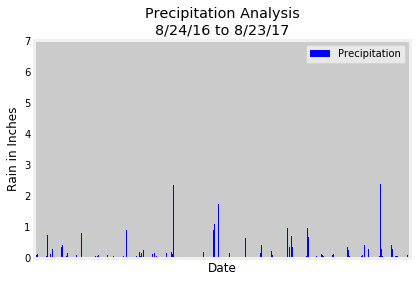

In [137]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
datequery = session.query(Measurement.id, Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).order_by(Measurement.date).all()
# datequery
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(datequery)
prcp_df.drop(["id"], axis=1)
#prcp_df.set_index('date', inplace = True)
#prcp_df.head()
#Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar('date', 'prcp', color="blue")
plt.xlabel("Date")
plt.tick_params(
    axis='x',  
    which='both',
    bottom=True,   
    top=False,     
    labelbottom=False)
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis\n8/24/16 to 8/23/17")
plt.legend(["Precipitation"])
plt.savefig('Images/Precipitation Analysis')
plt.show()

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,id,prcp
count,2230.000000,2021.000000
mean,10158.570404,0.177279
std,5603.500203,0.461190
min,2364.000000,0.000000
25%,5287.250000,0.000000
50%,8930.500000,0.020000
75%,14750.750000,0.130000
max,19550.000000,6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
stationquery = session.query(Station.station, Station.station).count()
print(f"Total number of Stations: {stationquery}")

Total number of Stations: 9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
#activestations.all()
data = list(activestations)
activestations_df = pd.DataFrame(data, columns=['Station', 'Count'])
activestations_df


,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#[(54.0, 85.0, 71.66378066378067)]
lowesttemp = session.query(func.min(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
listlt = list(lowesttemp)
print(f"The lowest recorded temperature: {listlt}")

The lowest recorded temperature: [54.0]


In [16]:
highesttemp = session.query(func.max(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
listht = list(highesttemp)
print(f"The highest recorded temperature: {listht}")

The highest recorded temperature: [85.0]


In [17]:
avgtemp = session.query(func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
listavg = list(avgtemp)
print(f"The average recorded temperature: {listavg}")

The average recorded temperature: [71.66378066378067]


In [18]:
# Choose the station with the highest number of temperature observations.
highHIGHtemp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.prcp > 0).first()
highHIGHtemp


('USC00519397', 87.0)

In [69]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tempobv = session.query(Measurement.date, Measurement.tobs).filter(Measurement.prcp > 0).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
year_tempobv_dict = dict(year_tempobv)
year_tempobv_dates = list(year_tempobv_dict.keys())
year_tempobv_temp = list(year_tempobv_dict.values())
year_tempobv


[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-28', 78.0),
 ('2016-08-31', 80.0),
 ('2016-09-04', 75.0),
 ('2016-09-07', 76.0),
 ('2016-09-09', 79.0),
 ('2016-09-11', 76.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-22', 76.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-10-17', 78.0),
 ('2016-10-21', 77.0),
 ('2016-10-22', 79.0),
 ('2016-10-23', 78.0),
 ('2016-10-25', 77.0),
 ('2016-10-30', 76.0),
 ('2016-10-31', 77.0),
 ('2016-11-08', 71.0),
 ('2016-11-19', 75.0),
 ('2016-11-20', 76.0),
 ('2016-11-21', 76.0),
 ('2016-11-22', 75.0),
 ('2016-11-23', 72.0),
 ('2016-11-24', 74.0),
 ('2016-11-25', 75.0),
 ('2016-11-26', 73.0),
 ('2016-11-28', 75.0),
 ('2016-11-30', 75.0),
 ('2016-12-01', 75.0),
 ('2016-12-02', 72.0),
 ('2016-12-04', 71.0),
 ('2016-12-05', 68.0),
 ('2016-12-06', 67.0),
 ('2016-12-08', 73.0),
 ('2016-12-09', 70.0),
 ('2016-12-10', 70.0),
 ('2016-12-11', 70.0),
 ('2016-12-

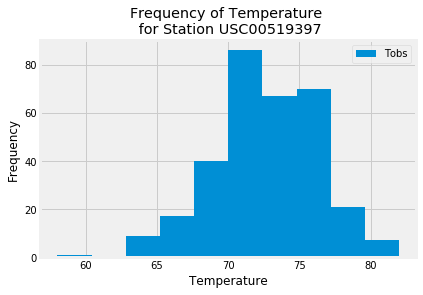

In [138]:
plt.hist(year_tempobv_temp)
plt.title("Frequency of Temperature \n for Station USC00519397")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])
plt.savefig('Images/Frequency of Temperature for Station USC00519397.jpg')

![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-23', '2017-08-23'))
tripdscrb = calc_temps('2016-08-23', '2017-08-23')
avgtemptrip = tripdscrb[0][1]
maxtemptrip = tripdscrb[0][2]
mintemptrip = tripdscrb[0][0]

[(58.0, 74.59058295964125, 87.0)]


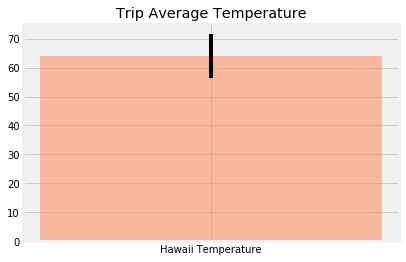

In [139]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value

x = ["Hawaii Temperature"]
yerr = maxtemptrip - avgtemptrip

plt.bar(x, avgtemptrip, color="coral", alpha=0.5, yerr=yerr)
# plt.ylabel("Temperature")
plt.title("Trip Average Temperature")
plt.savefig('Images/Trip Average Temperature')
plt.show()

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfalljoin = session.query(Station.name, Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude).group_by(Measurement.station).filter(Station.station == Measurement.station).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
#rainfalljoin 


railfalljoin_df = pd.DataFrame(rainfalljoin, columns=['Name', 'Station', 'Rainfall', 'Lat.', 'Long.'])
railfalljoin_df


,Name,Station,Rainfall,Lat.,Long.
0,"KANEOHE 838.1, HI US",USC00513117,48.51,21.42340,-157.80150
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,33.24,21.52130,-157.83740
2,"MANOA LYON ARBO 785.2, HI US",USC00516128,147.81,21.33310,-157.80250
3,"PEARL CITY, HI US",USC00517948,4.59,21.39340,-157.97510
4,"WAIHEE 837.5, HI US",USC00519281,70.03,21.45167,-157.84889
5,"WAIKIKI 717.2, HI US",USC00519397,16.09,21.27160,-157.81680
6,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,38.01,21.33556,-157.71139


## Optional Challenge Assignment

In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("04-13")

[('2017-04-13', 64.0, 71.52542372881356, 79.0)]

In [46]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
mytrip = daily_normals("04-13")
mintemptrip = mytrip[0][0]
avgtemptrip = mytrip[0][1]
maxtemptrip = mytrip[0][2]
mytripDailylist = [mintemptrip, avgtemptrip, maxtemptrip]

In [116]:
# Set the start and end date of the trip
startdate = '2016-04-13'
enddate = '2016-04-21'
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

tripdates = session.query(func.strftime("%m-%d", Measurement.date)).filter(Measurement.date >= startdate).filter(Measurement.date <= enddate).group_by(Measurement.date).all()
#tripdates

# Loop through the list of %m-%d strings and calculate the normals for each date
# tripdates_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= startdate).filter(Measurement.date <= enddate).group_by(Measurement.date).all()
# tripdates_tobs

sel = [func.strftime("%m-%d", Measurement.date), func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
tripdailys = session.query(*sel).filter(Measurement.date >= startdate, Measurement.date <= enddate).group_by(Measurement.date).all()
tripdailys


[('04-13', 71.0, 75.16666666666667, 77.0),
 ('04-14', 71.0, 74.83333333333333, 77.0),
 ('04-15', 70.0, 75.66666666666667, 79.0),
 ('04-16', 72.0, 75.4, 80.0),
 ('04-17', 66.0, 70.33333333333333, 74.0),
 ('04-18', 68.0, 71.85714285714286, 76.0),
 ('04-19', 67.0, 71.33333333333333, 74.0),
 ('04-20', 69.0, 73.14285714285714, 75.0),
 ('04-21', 68.0, 73.57142857142857, 76.0)]

In [127]:
tripdates_list = [i[0] for i in tripdates]
tripdates_list

['04-13',
 '04-14',
 '04-15',
 '04-16',
 '04-17',
 '04-18',
 '04-19',
 '04-20',
 '04-21']

In [96]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tripdailys_df = pd.DataFrame(tripdailys, columns=['date', 'min. Temp', 'avg. Temp', 'max. Temp'])
tripdailys_df = tripdailys_df.set_index('date')
tripdailys_df


,min. Temp,avg. Temp,max. Temp
date,,,
04-13,71.0,75.166667,77.0
04-14,71.0,74.833333,77.0
04-15,70.0,75.666667,79.0
04-16,72.0,75.400000,80.0
04-17,66.0,70.333333,74.0
04-18,68.0,71.857143,76.0
04-19,67.0,71.333333,74.0
04-20,69.0,73.142857,75.0
04-21,68.0,73.571429,76.0


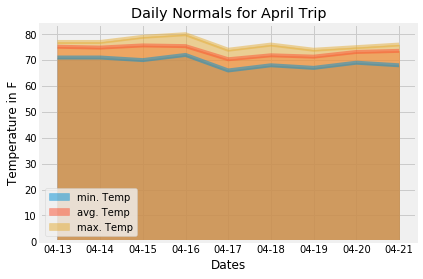

In [140]:
# Plot the daily normals as an area plot with `stacked=False`
ax = tripdailys_df.plot.area(stacked=False, title="Daily Normals for April Trip")

plt.xlabel("Dates")
plt.ylabel("Temperature in F")
ax.set_xticks(range(len(tripdates_list)))
ax.set_xticklabels(tripdates_list)
plt.savefig("Images/DailyNormals.jpg")